#### We import the data from merkur.xlsx

In [46]:
import pandas as pd

# Load the dataset
file_path = "merkur.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows to understand its structure
data.head()


,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.0,6.000000,5200.0,10.0,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.0,4.908739,300.0,28.0,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.0,15.343900,3800.0,83.3,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.0,26.0,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.0,4.5,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710


In [47]:
from sklearn.preprocessing import LabelEncoder

data_all = data.copy()

# Preprocessing each column
for column in data.columns:
    if data_all[column].dtype == 'object':
        # Convert non-numeric (object) columns using Label Encoding or other encoding
        encoder = LabelEncoder()
        data_all[column] = encoder.fit_transform(data_all[column].astype(str))
    else:
        # For numeric columns, fill NaN with mean (or other imputation method as needed)
        data_all[column].fillna(data_all[column].mean(), inplace=True)

C:\Users\popca\AppData\Local\Temp\ipykernel_7484\2199925045.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_all[column].fillna(data_all[column].mean(), inplace=True)
C:\Users\popca\AppData\Local\Temp\ipykernel_7484\2199925045.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

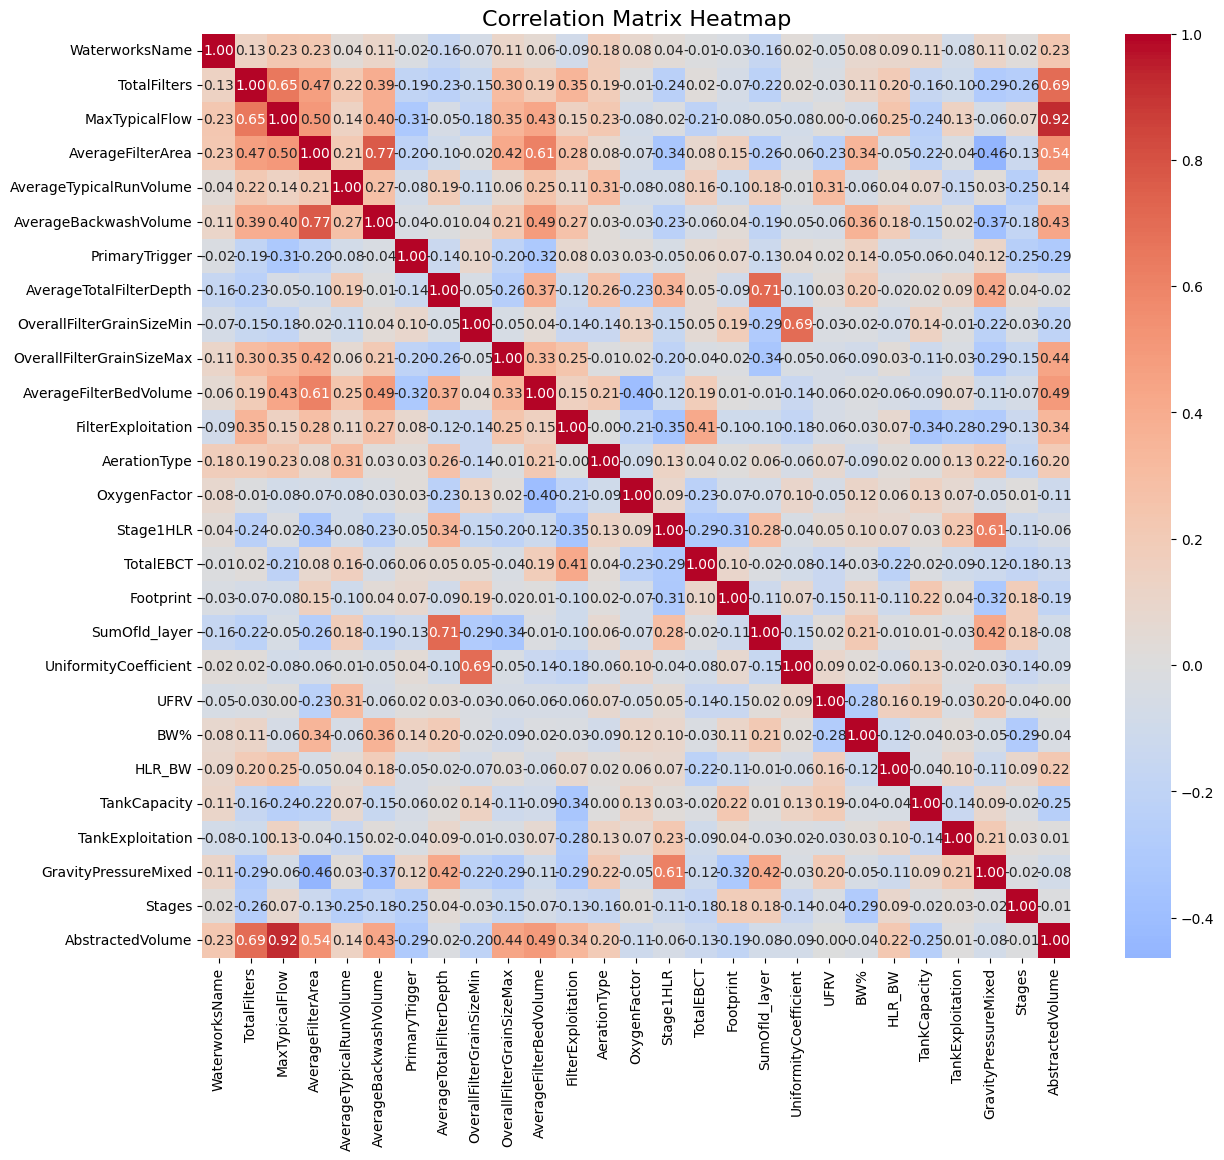

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recalculate the correlation matrix now that all columns are numeric
correlation_matrix = data_all.corr()

# Display the correlation matrix without using ace tools
correlation_matrix

# Set the figure size for better readability
plt.figure(figsize=(14, 12))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

# Add title for clarity
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Display the heatmap
plt.show()

### SumOfIdLayer and IdCoefficient, we observed that they are correlated to AverageTotalFilterDepth and OverallFilterGrainSizeMin. 
### All of these columns are missing above 40% of samples which led us to fill the NaN with the mean of its column.
### This makes the correlation innacurate. As it is based on fake data.

#### We identified the percentage of missing data for each column.

In [49]:
# Calculate the percentage of missing values for each column
missing_percent = data.isnull().mean() * 100

# Sort and display the missing percentages in descending order
missing_percent = missing_percent.sort_values(ascending=False)

# Display 
missing_percent


UniformityCoefficient        64.556962
TotalEBCT                    49.367089
SumOfld_layer                49.367089
AverageFilterBedVolume       43.037975
OverallFilterGrainSizeMin    43.037975
OverallFilterGrainSizeMax    43.037975
AverageTotalFilterDepth      41.772152
TankExploitation             37.974684
HLR_BW                       34.177215
Stage1HLR                    26.582278
MaxTypicalFlow               20.253165
FilterExploitation           20.253165
BW%                          16.455696
AverageBackwashVolume        12.658228
UFRV                          8.860759
AverageFilterArea             5.063291
TankCapacity                  5.063291
Footprint                     5.063291
AverageTypicalRunVolume       2.531646
PrimaryTrigger                0.000000
TotalFilters                  0.000000
WaterworksName                0.000000
OxygenFactor                  0.000000
AerationType                  0.000000
GravityPressureMixed          0.000000
Stages                   

The analysis of data reveals that many columns have a high percentage of missing values:

UniformityCoefficient, SumOfld_layer, TotalEBCT, AverageFilterBedVolume, and OverallFilterGrainSizeMin/Max have over 34% missing values, making them candidates for removal.

As well we remove columns with low correlation 

#### Now we focus on removing irrelevant columns and those with excessive missing values. Then, we can decide on the treatment for the remaining missing data. ​

In [50]:
# Remove irrelevant columns and those with excessive missing data (over 40% missing)
columns_to_remove = [
    "WaterworksName", "UniformityCoefficient", "SumOfld_layer", "TotalEBCT",
    "AverageFilterBedVolume", "OverallFilterGrainSizeMin", "OverallFilterGrainSizeMax", "TankExploitation", "HLR_BW"
]
data_cleaned = data.drop(columns=columns_to_remove)

# Display the resulting dataset structure after column removal
data_cleaned.head()


,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,TankCapacity,GravityPressureMixed,Stages,AbstractedVolume
0,6,50.0,6.000000,5200.0,10.0,Time,NaN,57.886530,Cascade,1.880000,1.388889,143.341204,866.666667,0.414525,27.294778,Gravity,Single,253543
1,4,110.0,4.908739,300.0,28.0,Volume,310.0,63.521586,Air injection,1.620000,11.204508,16.714412,40.743665,23.000062,2.576075,Pressure,Double,612094
2,4,120.0,15.343900,3800.0,83.3,Volume,190.0,64.908486,Bottom aeration,2.213333,3.935020,44.693822,249.217919,2.192086,21.825600,Gravity,Double,682318
3,2,NaN,16.000000,1200.0,26.0,Volume,NaN,NaN,Cascade,2.073333,NaN,194.588021,75.000000,2.166907,12.554300,Gravity,Single,156998
4,2,NaN,1.495000,250.0,4.5,Volume,NaN,NaN,Cascade,1.313333,NaN,412.300024,167.224093,1.818182,52.220566,Gravity,Single,6710


 #### Now we will focus on the next 3 steps:
* Scaling Numeric Data: Normalizing/standardizing numerical columns.
* Imputation of Missing Values: Imputing or removal of rows for columns that still have missing data.
* One-Hot Encoding: Encoding categorical variables like PrimaryTrigger and GravityPressureMixed, while considering a different approach for Stages.

In [51]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns for scaling (excluding target-like 'AbstractedVolume')
numeric_columns = data_cleaned.select_dtypes(include='number').columns.drop('AbstractedVolume')

# Scale the numeric columns
scaler = StandardScaler()
data_cleaned[numeric_columns] = scaler.fit_transform(data_cleaned[numeric_columns])

# Display the scaled data to the user
data_cleaned.head()


,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,TankCapacity,GravityPressureMixed,Stages,AbstractedVolume
0,-0.062970,-0.615572,-0.658687,0.013068,-0.827796,Time,NaN,-0.105711,Cascade,-0.095208,-0.910784,0.885898,2.721340,-0.465674,0.634165,Gravity,Single,253543
1,-0.560431,-0.396440,-0.784768,-0.540142,-0.321756,Volume,2.694874,0.134672,Air injection,-1.127717,1.429302,-0.820640,-1.331469,3.667836,-1.107257,Pressure,Double,612094
2,-0.560431,-0.359918,0.420872,-0.144992,1.232912,Volume,0.676976,0.193835,Bottom aeration,1.228522,-0.303775,-0.443564,-0.308485,-0.140352,0.248864,Gravity,Double,682318
3,-1.057891,NaN,0.496675,-0.438532,-0.377982,Volume,NaN,NaN,Cascade,0.672555,NaN,1.576548,-1.163373,-0.144961,-0.404295,Gravity,Single,156998
4,-1.057891,NaN,-1.179178,-0.545787,-0.982419,Volume,NaN,NaN,Cascade,-2.345548,NaN,4.510634,-0.710829,-0.208783,2.390177,Gravity,Single,6710


In [52]:
from sklearn.impute import SimpleImputer

# Define an imputer for numeric columns (using median to handle missing values)
imputer = SimpleImputer(strategy='median')
data_cleaned[numeric_columns] = imputer.fit_transform(data_cleaned[numeric_columns])

# One-hot encode categorical columns
data_encoded = pd.get_dummies(
    data_cleaned,
    columns=["PrimaryTrigger", "GravityPressureMixed", "AerationType"],
    drop_first=True  # To avoid multicollinearity
)

# Handle 'Stages' as a separate case (since it's ordinal)
# Assuming 'Single' < 'Double', encode it manually
data_encoded['Stages'] = data_encoded['Stages'].map({'Single': 1, 'Double': 2})

# Display the cleaned and encoded dataset
data_encoded.head()


,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,AverageTotalFilterDepth,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,...,PrimaryTrigger_Waterlevel above filter,GravityPressureMixed_Mixed,GravityPressureMixed_Pressure,AerationType_Bottom aeration,AerationType_Cascade,AerationType_Inka,AerationType_No primary aeration,AerationType_Other,AerationType_Passive plate aerator,AerationType_Pure oxygen injection
0,-0.062970,-0.615572,-0.658687,0.013068,-0.827796,-0.180631,-0.105711,-0.095208,-0.910784,0.885898,...,False,False,False,False,True,False,False,False,False,False
1,-0.560431,-0.396440,-0.784768,-0.540142,-0.321756,2.694874,0.134672,-1.127717,1.429302,-0.820640,...,False,False,True,False,False,False,False,False,False,False
2,-0.560431,-0.359918,0.420872,-0.144992,1.232912,0.676976,0.193835,1.228522,-0.303775,-0.443564,...,False,False,False,True,False,False,False,False,False,False
3,-1.057891,-0.359918,0.496675,-0.438532,-0.377982,-0.180631,0.124349,0.672555,-0.349672,1.576548,...,False,False,False,False,True,False,False,False,False,False
4,-1.057891,-0.359918,-1.179178,-0.545787,-0.982419,-0.180631,0.124349,-2.345548,-0.349672,4.510634,...,False,False,False,False,True,False,False,False,False,False


#### Next, we can analyze the correlation matrix to identify highly correlated features, which could be candidates for removal.

In [53]:
# Recalculate the correlation matrix now that all columns are numeric
correlation_matrix = data_encoded.corr()

# Display the correlation matrix without using ace tools
correlation_matrix



,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,AverageTotalFilterDepth,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,...,PrimaryTrigger_Waterlevel above filter,GravityPressureMixed_Mixed,GravityPressureMixed_Pressure,AerationType_Bottom aeration,AerationType_Cascade,AerationType_Inka,AerationType_No primary aeration,AerationType_Other,AerationType_Passive plate aerator,AerationType_Pure oxygen injection
TotalFilters,1.000000,0.662489,0.477332,0.213492,0.391166,-0.197567,0.341815,-0.010480,-0.206244,-0.057721,...,-0.035293,-0.090322,-0.273011,0.104730,0.049702,0.161849,-0.119783,-0.091619,0.186504,0.041371
MaxTypicalFlow,0.662489,1.000000,0.480442,0.135006,0.386775,-0.005008,0.134057,-0.096632,0.009466,-0.130040,...,-0.078162,-0.085292,-0.034506,0.052442,-0.046957,0.105782,-0.079350,-0.048678,0.315814,0.044496
AverageFilterArea,0.477332,0.480442,1.000000,0.203260,0.777654,-0.079343,0.289772,-0.064218,-0.341856,0.151582,...,-0.078886,-0.104048,-0.456561,0.118813,0.223061,0.043278,-0.132237,0.018459,-0.115463,0.034474
AverageTypicalRunVolume,0.213492,0.135006,0.203260,1.000000,0.276109,0.211485,0.096711,-0.076801,-0.063132,-0.095407,...,-0.037890,-0.052871,0.032055,-0.073965,0.023347,-0.014725,-0.059372,-0.000489,-0.008587,0.358379
AverageBackwashVolume,0.391166,0.386775,0.777654,0.276109,1.000000,0.003892,0.280403,-0.039215,-0.221191,0.029168,...,-0.087655,-0.030163,-0.375866,0.190165,0.133345,-0.027973,-0.126990,-0.014410,-0.021263,-0.053227
AverageTotalFilterDepth,-0.197567,-0.005008,-0.079343,0.211485,0.003892,1.000000,-0.090804,-0.238458,0.339726,-0.120238,...,-0.149333,0.138443,0.365131,-0.020183,-0.274648,-0.149333,-0.015501,0.011761,0.032833,0.425115
FilterExploitation,0.341815,0.134057,0.289772,0.096711,0.280403,-0.090804,1.000000,-0.200059,-0.344214,-0.075221,...,-0.017403,0.062992,-0.300627,0.182899,0.035354,-0.137507,-0.221914,0.210203,-0.122146,0.029179
OxygenFactor,-0.010480,-0.096632,-0.064218,-0.076801,-0.039215,-0.238458,-0.200059,1.000000,0.076725,-0.064305,...,-0.001787,0.139326,-0.077751,-0.085538,0.116962,0.169079,0.073154,0.007206,0.173662,-0.308126
Stage1HLR,-0.206244,0.009466,-0.341856,-0.063132,-0.221191,0.339726,-0.344214,0.076725,1.000000,-0.350191,...,-0.017365,0.043747,0.575178,-0.340368,-0.184638,-0.074606,0.069890,-0.076202,0.263148,0.141429
Footprint,-0.057721,-0.130040,0.151582,-0.095407,0.029168,-0.120238,-0.075221,-0.064305,-0.350191,1.000000,...,-0.045786,-0.103485,-0.318151,-0.018628,0.292562,0.030896,0.019898,-0.043953,-0.017391,-0.123828


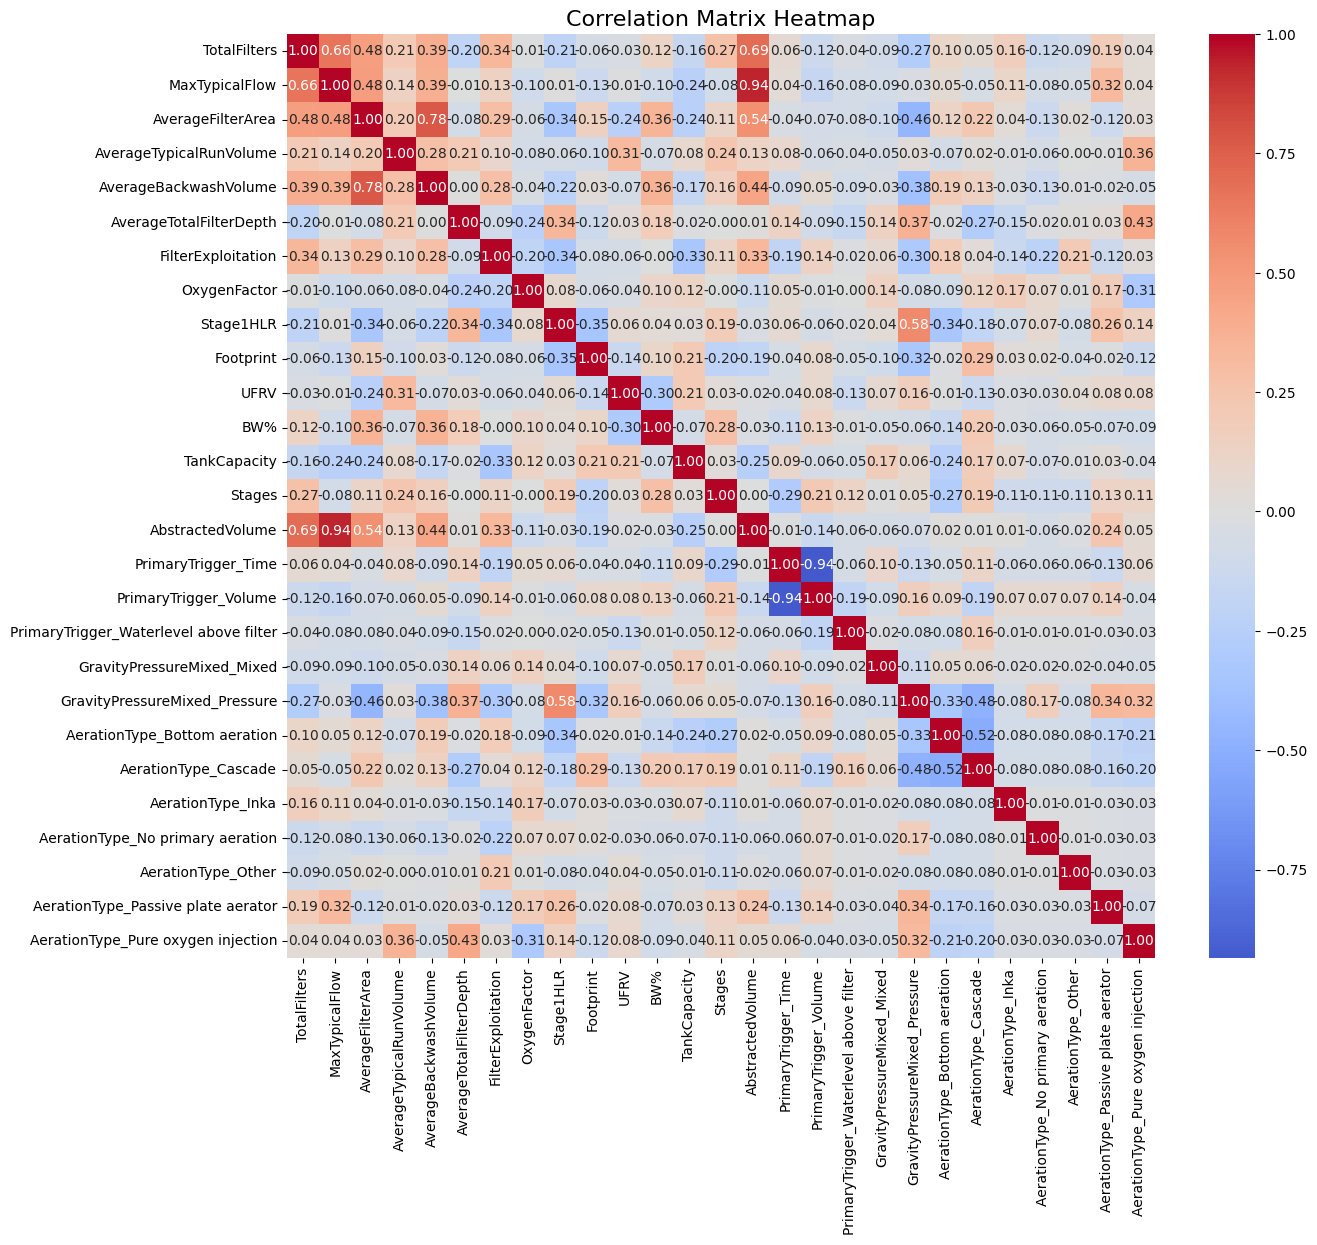

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better readability
plt.figure(figsize=(14, 12))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

# Add title for clarity
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Display the heatmap
plt.show()


The heatmap above visually represents the correlation matrix, where:

* Red shades indicate positive correlations.
* Blue shades indicate negative correlations.
*  Darker shades (closer to -1 or +1) indicate stronger relationships, while lighter shades (closer to 0) show weaker correlations.

Consequences of a Small Dataset:

Risk of Overfitting: With a small dataset, there’s a high risk of overfitting, where the model learns the training data too well and fails to generalize to new data. This is because there isn’t enough data to capture all the variability.

Low Statistical Power: Small datasets make it hard to detect true patterns in the data. The model might not be able to differentiate between actual patterns and noise.

Unstable Model Performance: Small datasets tend to produce models that are sensitive to small changes in the data. This can lead to high variance in model performance, making the results unreliable.

Limited Model Choice: Complex models like deep learning require large amounts of data to perform well. With only 80 rows, simpler models (e.g., linear regression, decision trees with limited depth) are more suitable, as they’re less likely to overfit.

The data is clean.